In [1]:
import proplot as pplt
import matplotlib as plt
import numpy as np
import rasterio as rio
from rasterio.plot import show
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature

from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.transform import array_bounds

In [2]:
months = ['june', 'july', 'august', 'september', 'october', 'november', 'december', 'january', 'february', 'march', 'april', 'may']
anoms = {}

for month in months:
    anoms[month] = rio.open(f'./Data/Enviro/{month}_tmax_anom.tif', 'r')

In [3]:
dest_crs = ccrs.LambertConformal(central_longitude=-76.0, central_latitude=42.0,)

def prepare_for_viz(raster_file, dest_crs):
    transform, width, height = calculate_default_transform(
        raster_file.crs, dest_crs, raster_file.width, raster_file.height, *raster_file.bounds)
    
    new_image, new_transform = reproject(
        source=raster_file.read(),
        src_transform=raster_file.transform,
        src_crs=raster_file.crs,
        dst_crs=dest_crs,
        resampling=Resampling.nearest,
        dst_nodata=np.nan)
    
    new_bounds = array_bounds(new_image.shape[1], new_image.shape[2], new_transform)
    
    return new_image, new_bounds

images = {}
bounds = {}

for month in months:
    images[month], bounds[month] = prepare_for_viz(anoms[month], dest_crs)

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

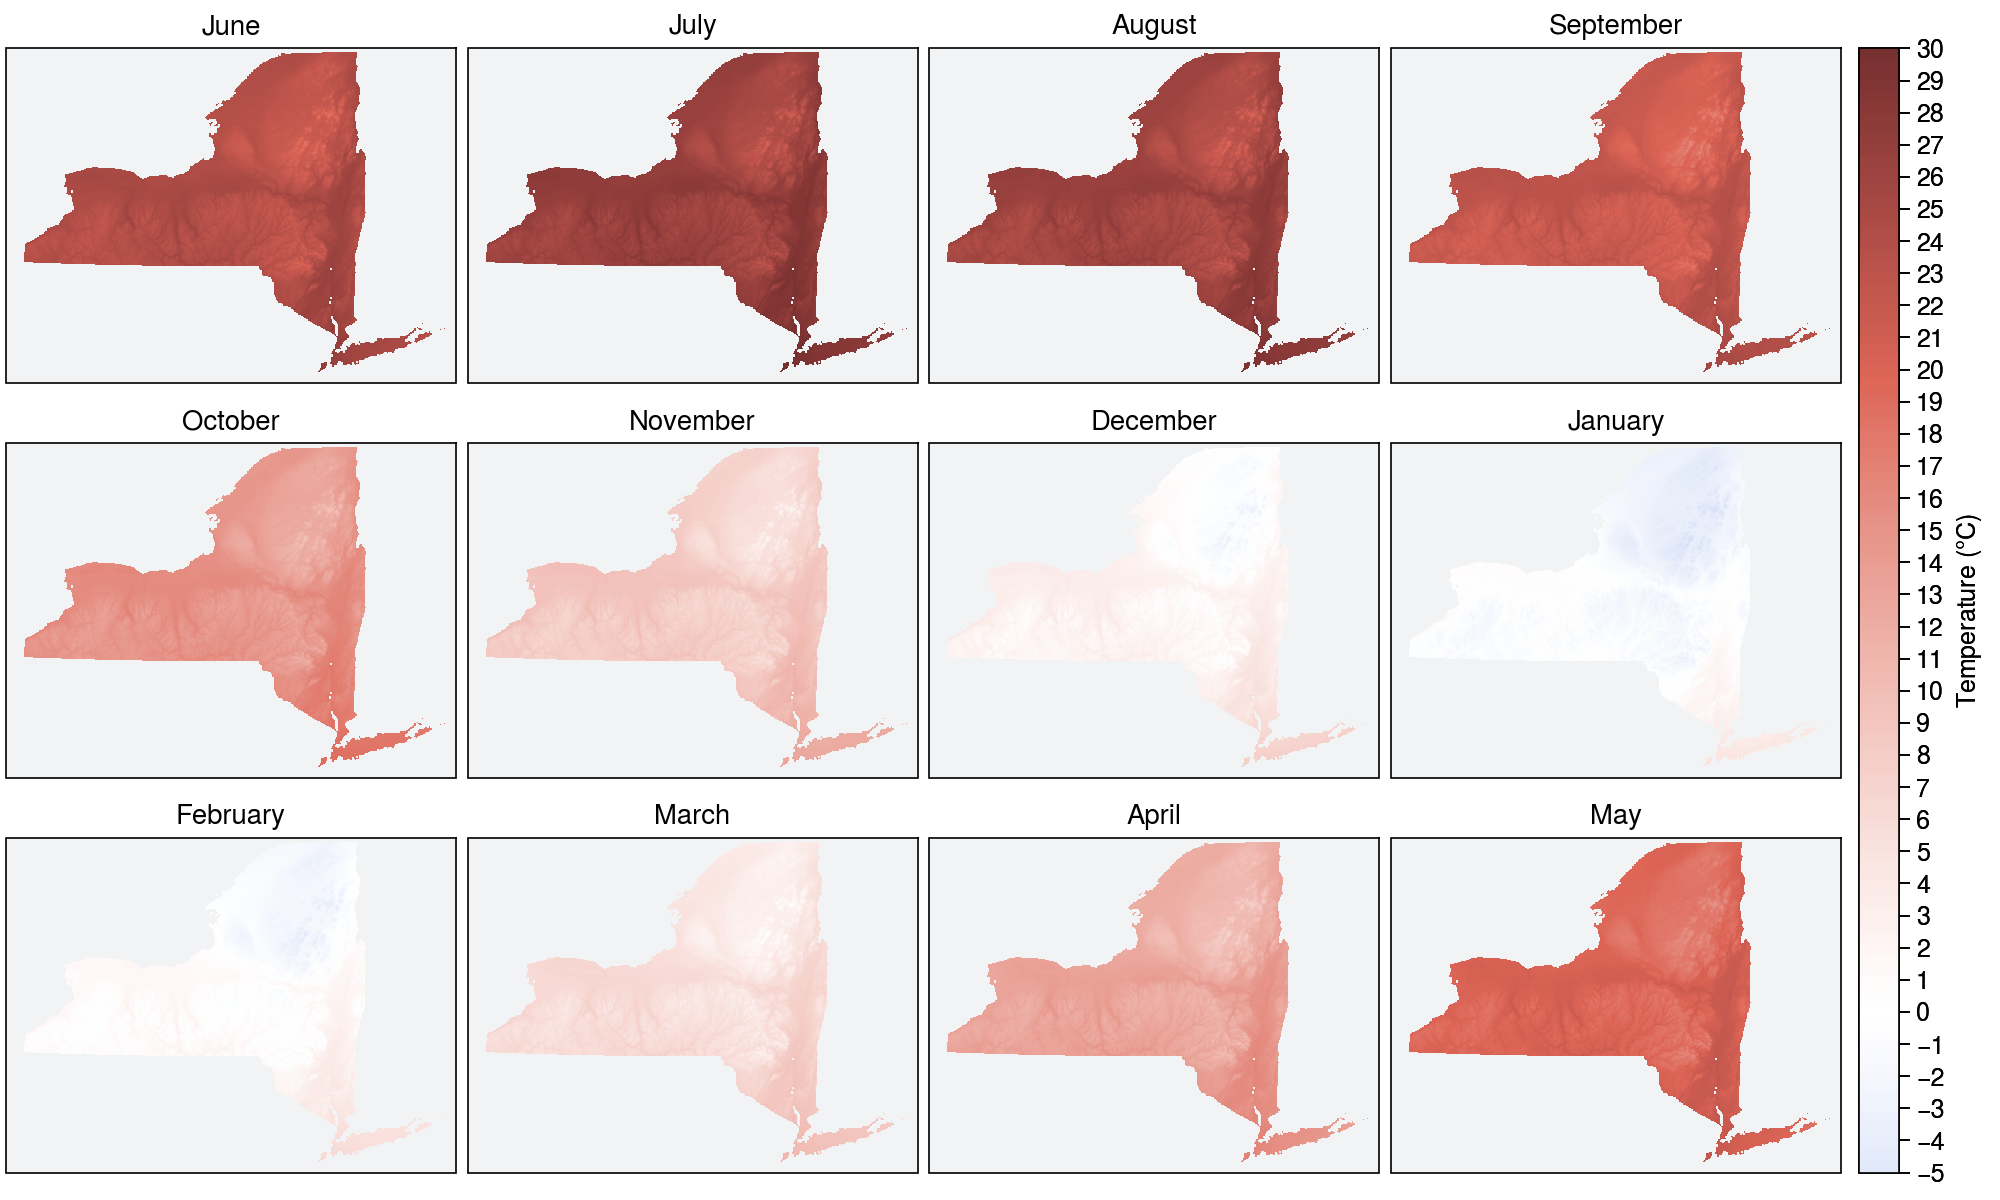

In [5]:
fig, axes = pplt.subplots(nrows=3, ncols=4, figsize=(10,6), proj=dest_crs, facecolor='white')

vmin = -5
vmax = 30

for i, month in enumerate(months):
    m = axes[i].imshow(images[month][0], cmap='NegPos', transform=dest_crs, vmin=vmin, vmax=vmax,
                       extent=[bounds[month][0], bounds[month][2], bounds[month][1], bounds[month][3]])
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].format(grid=False, facecolor='gray1', title=month.title())

fig.colorbar(m, label='Temperature ($\degree$C)', ticks=1, loc='r')

# fig.savefig('./Figures/Enviro/tmax_mean.png')

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

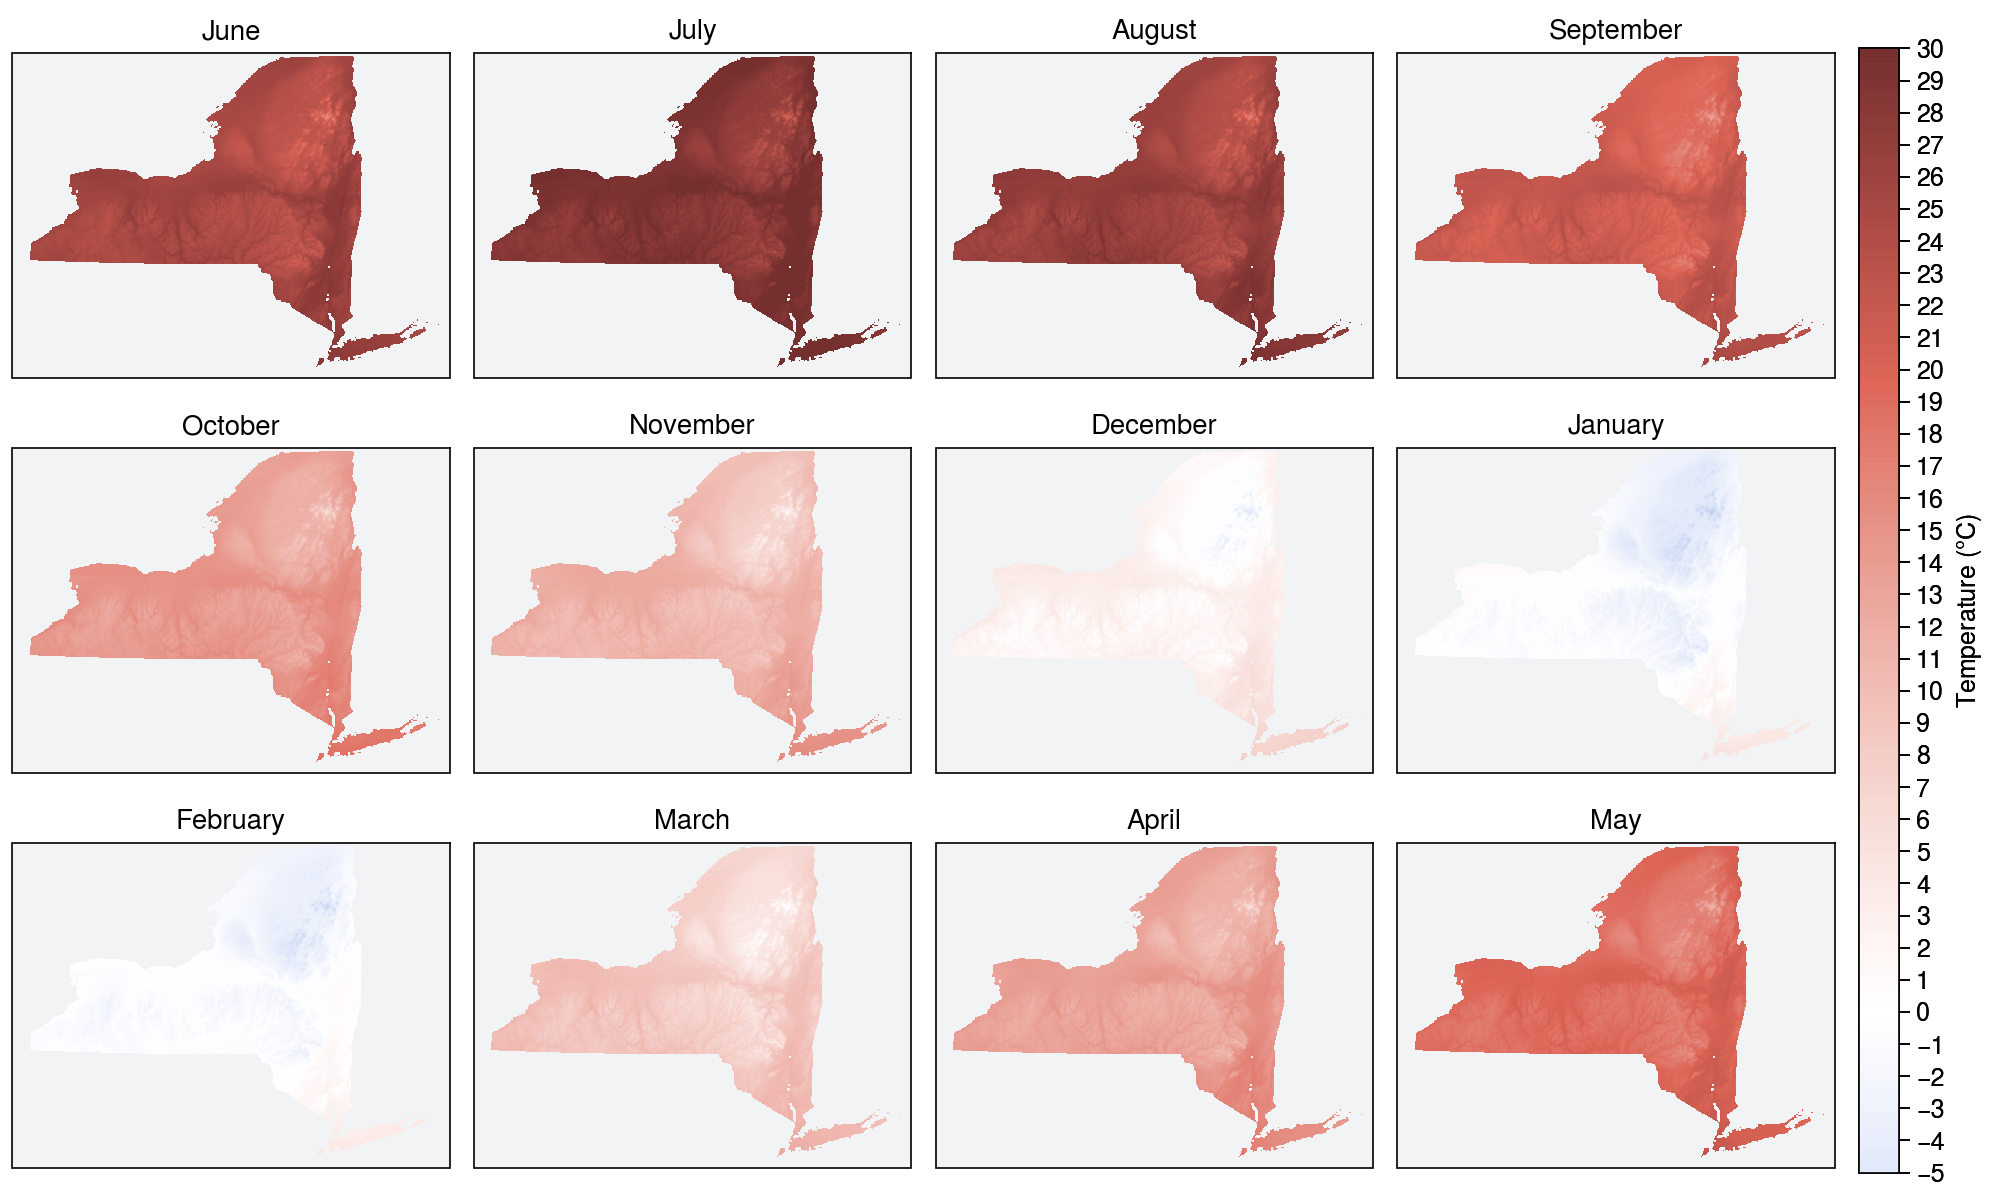

In [27]:
fig, axes = pplt.subplots(nrows=3, ncols=4, figsize=(10,6), proj=dest_crs, facecolor='white')

vmin = -5
vmax = 30

for i, month in enumerate(months):
    m = axes[i].imshow(images[month][1], cmap='NegPos', transform=dest_crs, vmin=vmin, vmax=vmax,
                       extent=[bounds[month][0], bounds[month][2], bounds[month][1], bounds[month][3]])
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].format(grid=False, facecolor='gray1', title=month.title())

fig.colorbar(m, label='Temperature ($\degree$C)', ticks=1, loc='r')

fig.savefig('./Figures/Enviro/tmax_prior_year.png')

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

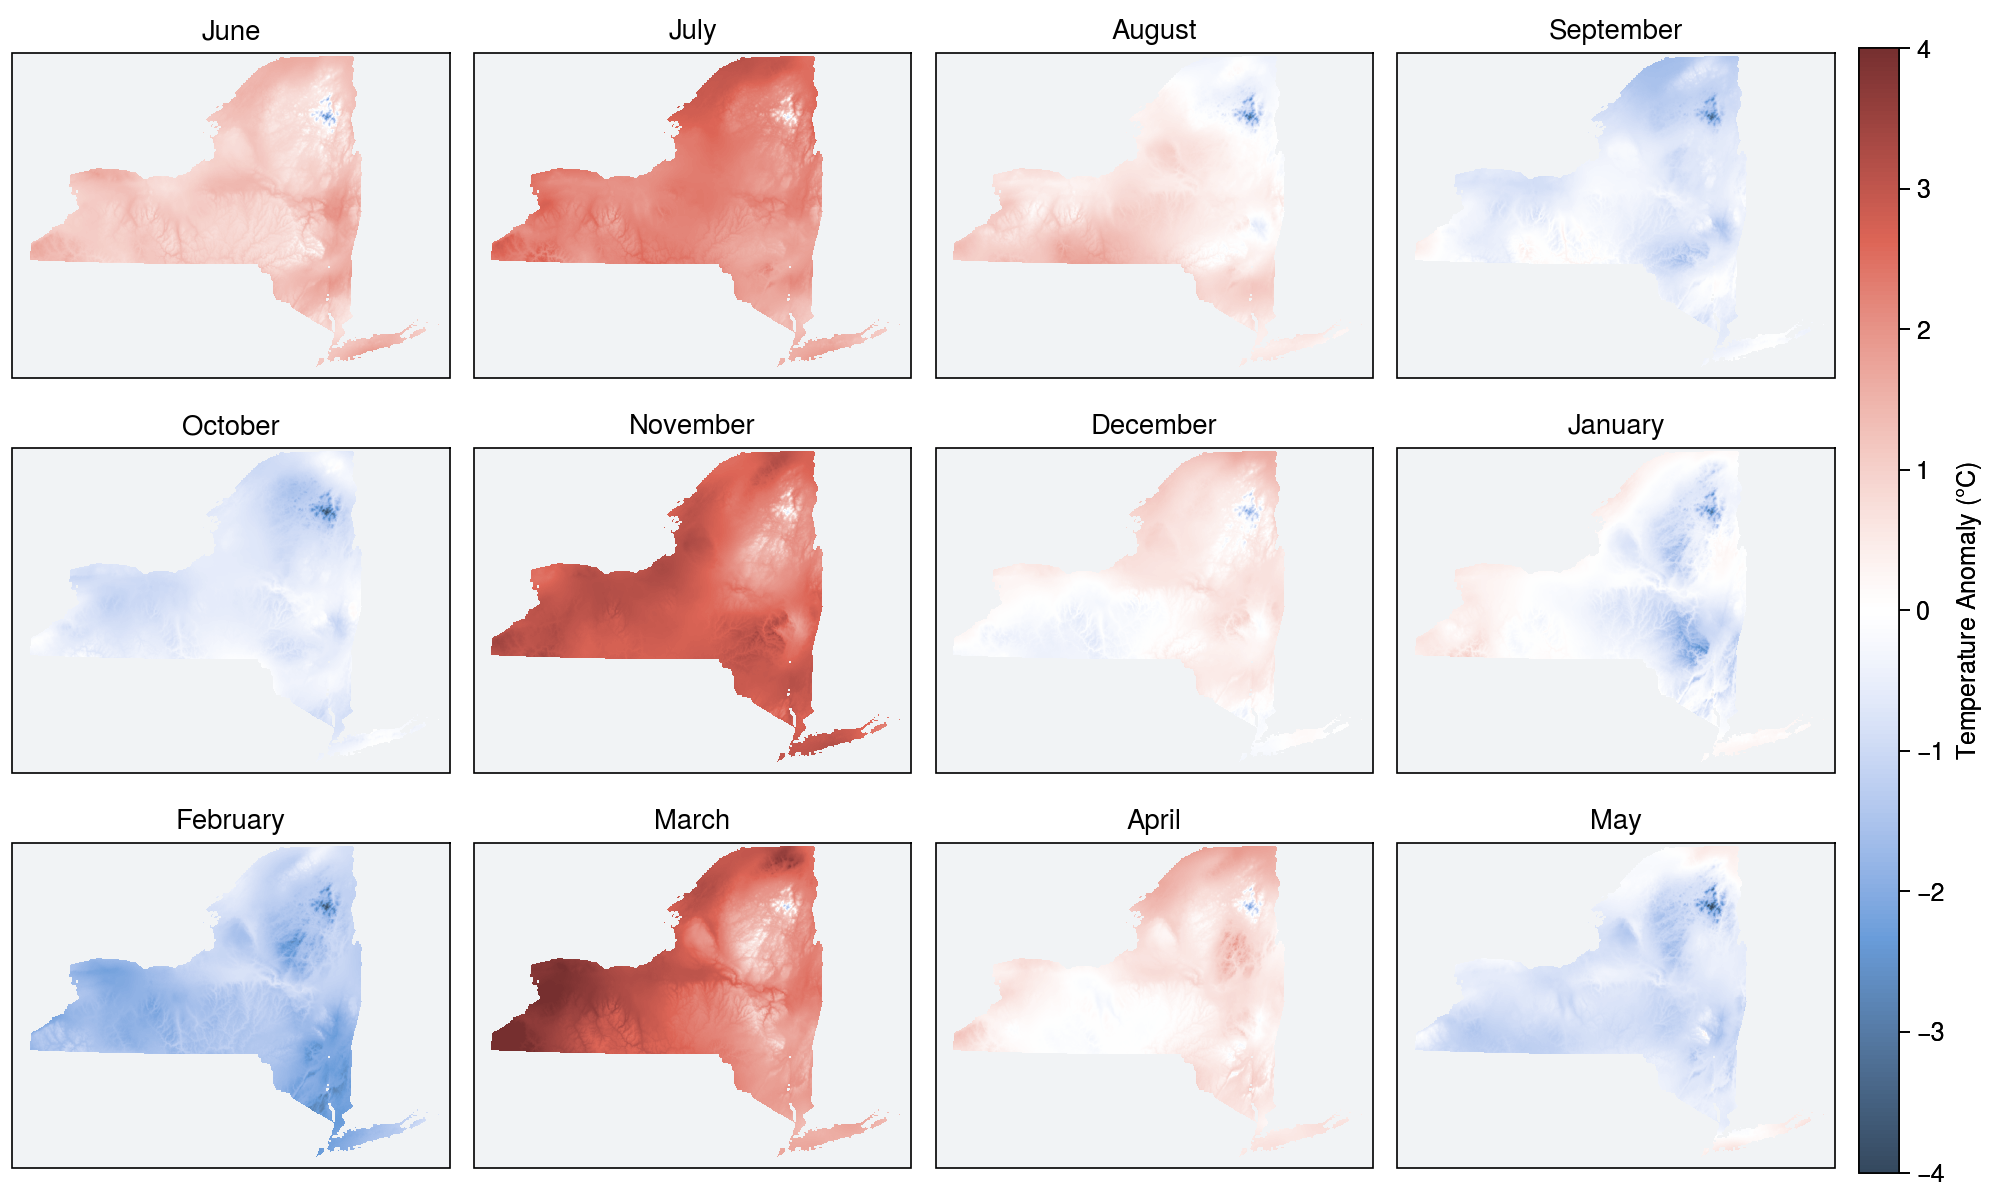

In [28]:
fig, axes = pplt.subplots(nrows=3, ncols=4, figsize=(10,6), proj=dest_crs, facecolor='white')

vmin = -4
vmax = 4

for i, month in enumerate(months):
    m = axes[i].imshow(images[month][2], cmap='NegPos', transform=dest_crs, vmin=vmin, vmax=vmax,
                       extent=[bounds[month][0], bounds[month][2], bounds[month][1], bounds[month][3]])
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].format(grid=False, facecolor='gray1', title=month.title())

fig.colorbar(m, label='Temperature Anomaly ($\degree$C)', ticks=1, loc='r')

fig.savefig('./Figures/Enviro/tmax_anom.png')

## Minimum Temperature

In [16]:
anoms = {}
images = {}
bounds = {}

for month in months:
    anoms[month] = rio.open(f'./Data/Enviro/{month}_tmin_anom.tif', 'r')
    images[month], bounds[month] = prepare_for_viz(anoms[month], dest_crs)

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

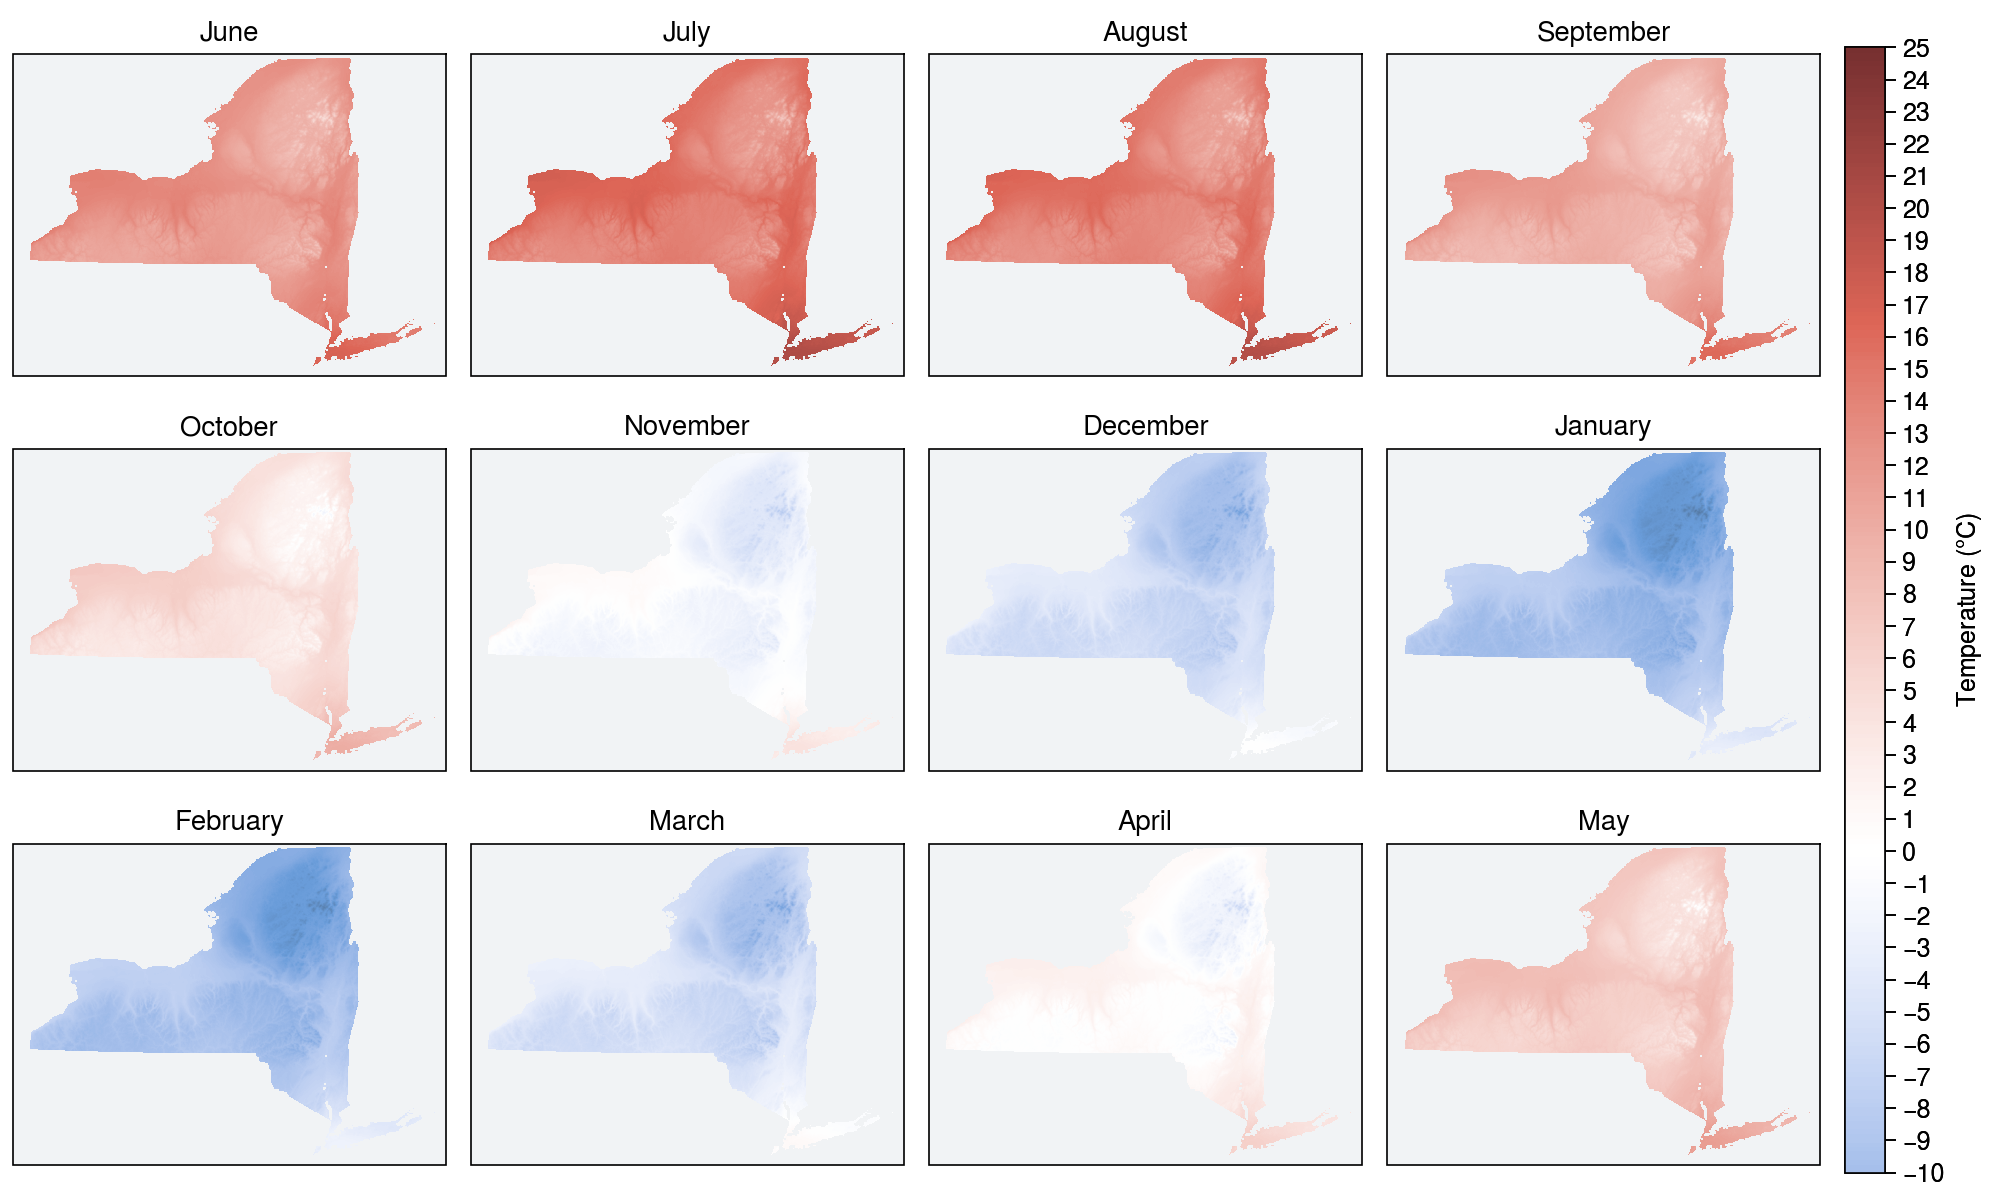

In [21]:
fig, axes = pplt.subplots(nrows=3, ncols=4, figsize=(10,6), proj=dest_crs, facecolor='white')

vmin = -10
vmax = 25

for i, month in enumerate(months):
    m = axes[i].imshow(images[month][0], cmap='NegPos', transform=dest_crs, vmin=vmin, vmax=vmax,
                       extent=[bounds[month][0], bounds[month][2], bounds[month][1], bounds[month][3]])
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].format(grid=False, facecolor='gray1', title=month.title())

fig.colorbar(m, label='Temperature ($\degree$C)', ticks=1, loc='r')

fig.savefig('./Figures/Enviro/tmin_mean.png')

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

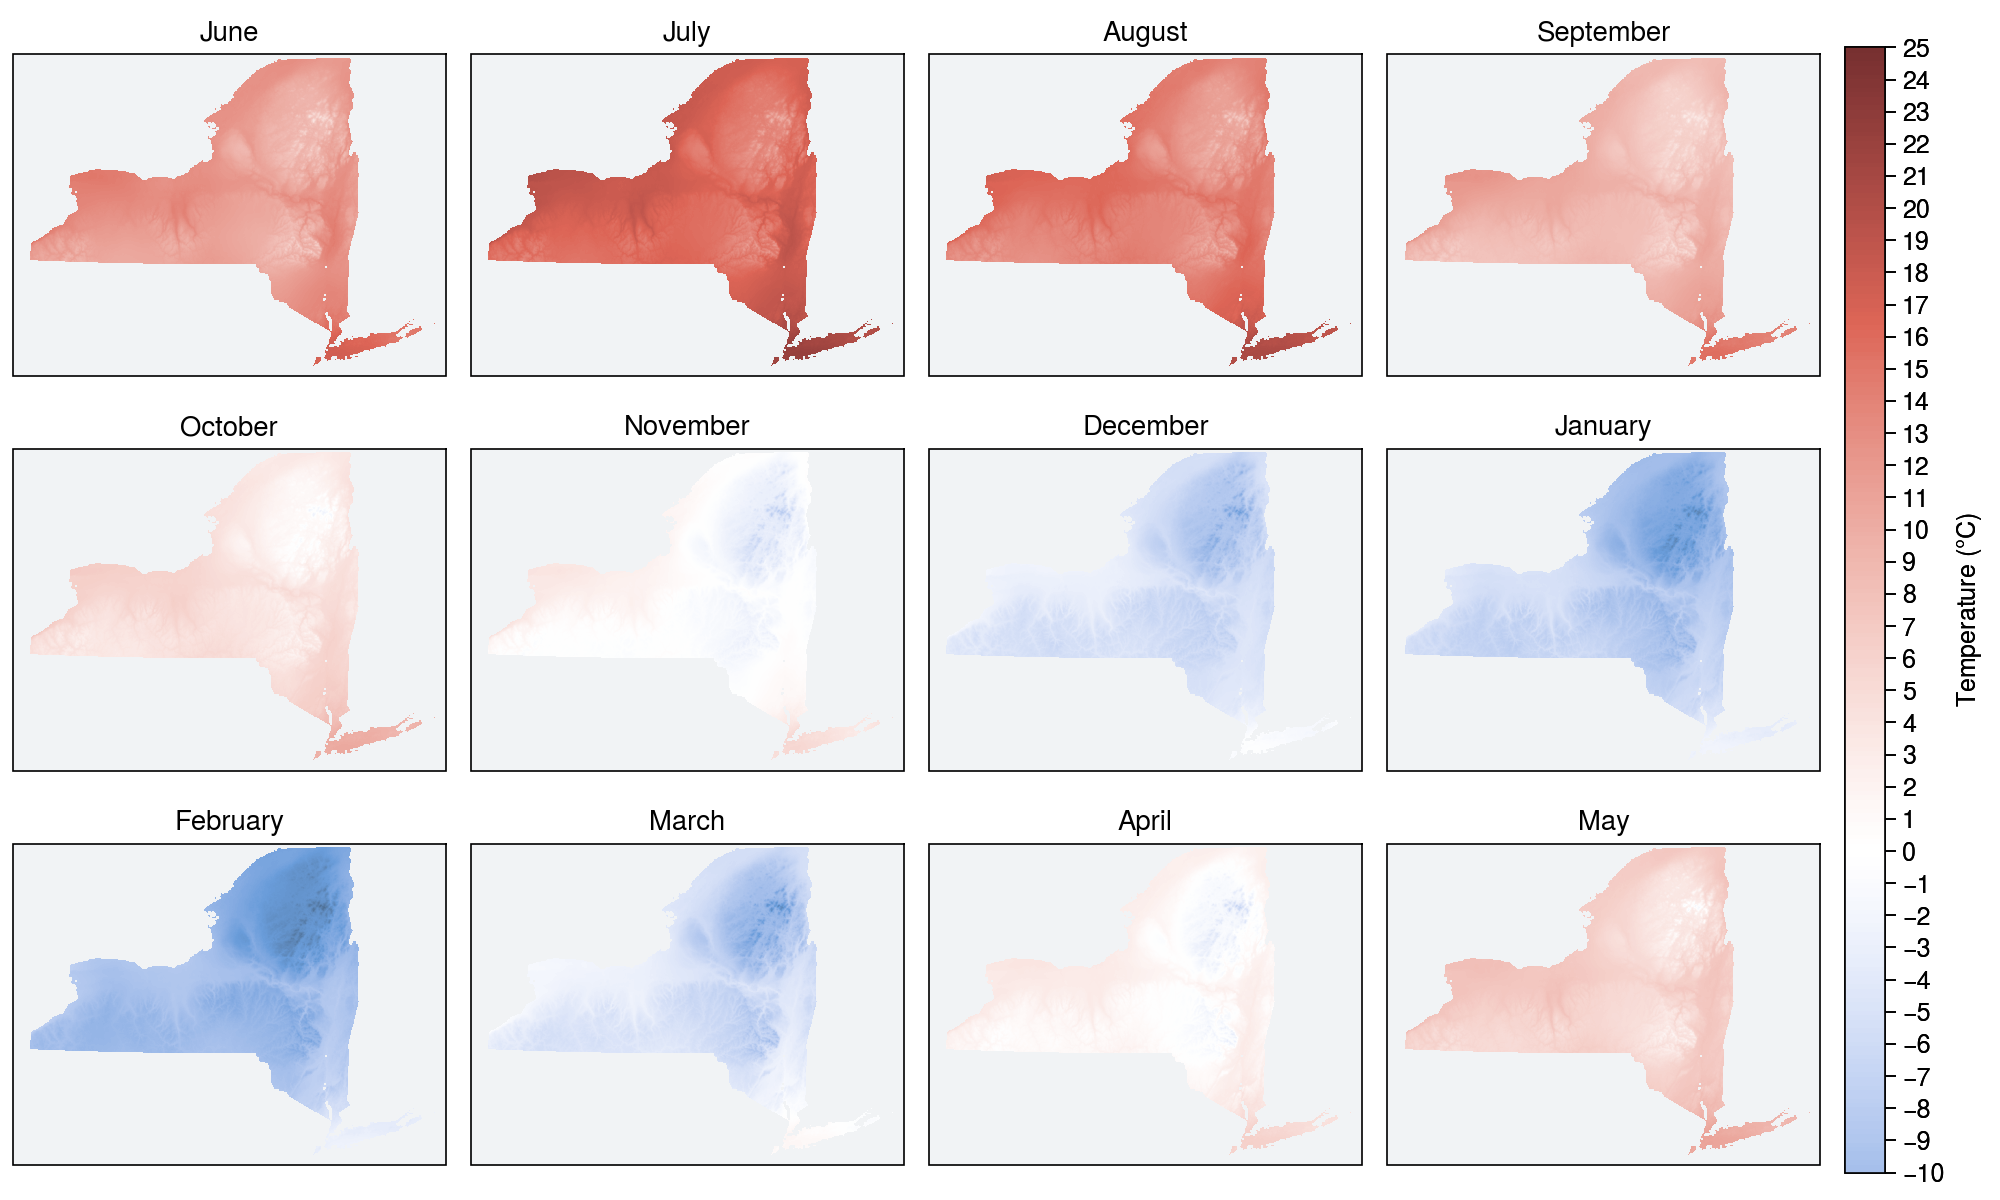

In [22]:
fig, axes = pplt.subplots(nrows=3, ncols=4, figsize=(10,6), proj=dest_crs, facecolor='white')

vmin = -10
vmax = 25

for i, month in enumerate(months):
    m = axes[i].imshow(images[month][1], cmap='NegPos', transform=dest_crs, vmin=vmin, vmax=vmax,
                       extent=[bounds[month][0], bounds[month][2], bounds[month][1], bounds[month][3]])
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].format(grid=False, facecolor='gray1', title=month.title())

fig.colorbar(m, label='Temperature ($\degree$C)', ticks=1, loc='r')

fig.savefig('./Figures/Enviro/tmin_prior_year.png')

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

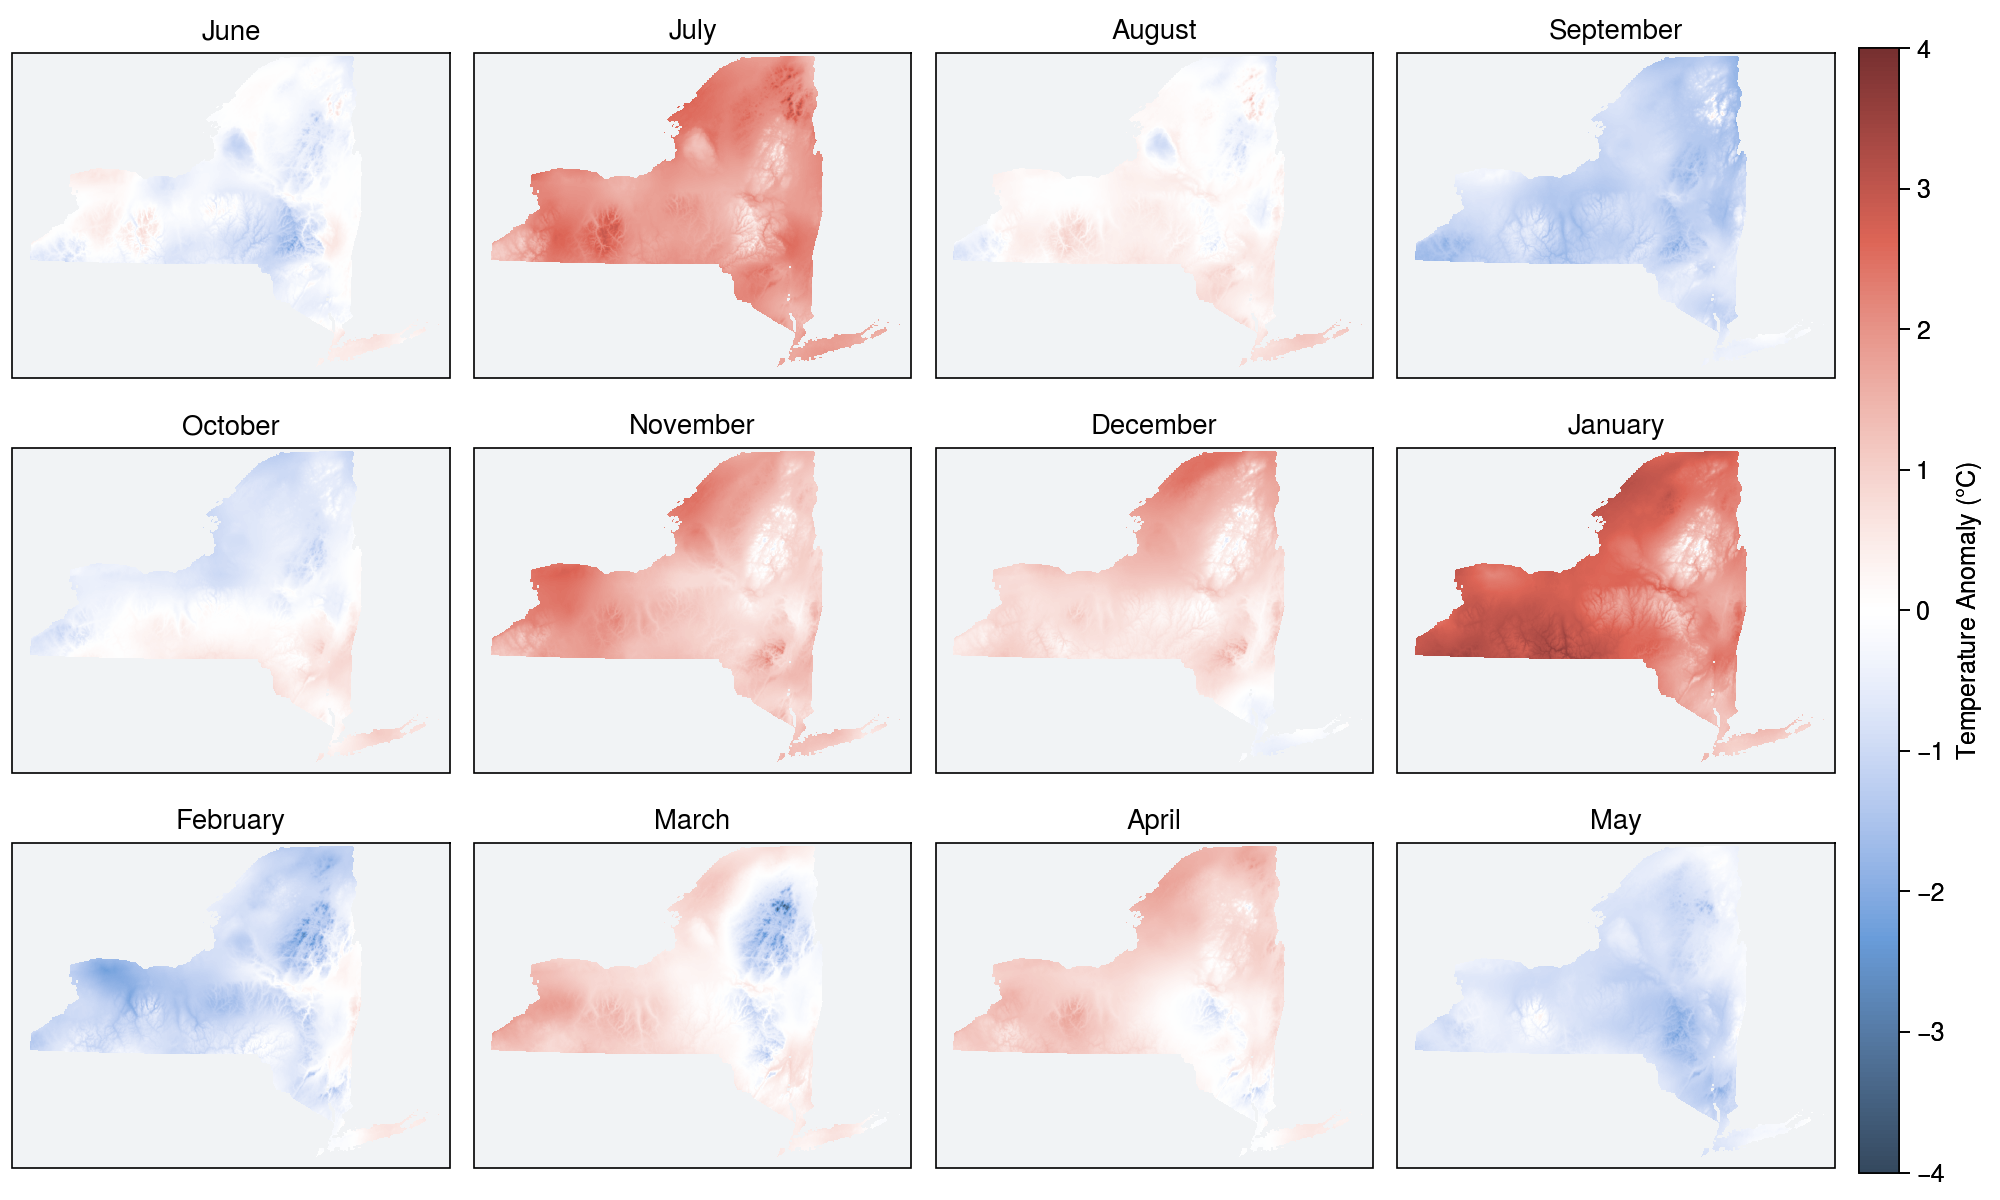

In [23]:
fig, axes = pplt.subplots(nrows=3, ncols=4, figsize=(10,6), proj=dest_crs, facecolor='white')

vmin = -4
vmax = 4

for i, month in enumerate(months):
    m = axes[i].imshow(images[month][2], cmap='NegPos', transform=dest_crs, vmin=vmin, vmax=vmax,
                       extent=[bounds[month][0], bounds[month][2], bounds[month][1], bounds[month][3]])
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].format(grid=False, facecolor='gray1', title=month.title())

fig.colorbar(m, label='Temperature Anomaly ($\degree$C)', ticks=1, loc='r')

fig.savefig('./Figures/Enviro/tmin_anom.png')

## Precipitation

In [29]:
anoms = {}
images = {}
bounds = {}

for month in months:
    anoms[month] = rio.open(f'./Data/Enviro/{month}_prcp_anom.tif', 'r')
    images[month], bounds[month] = prepare_for_viz(anoms[month], dest_crs)

In [12]:
for month in months:
    images[month] = images[month]/24

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

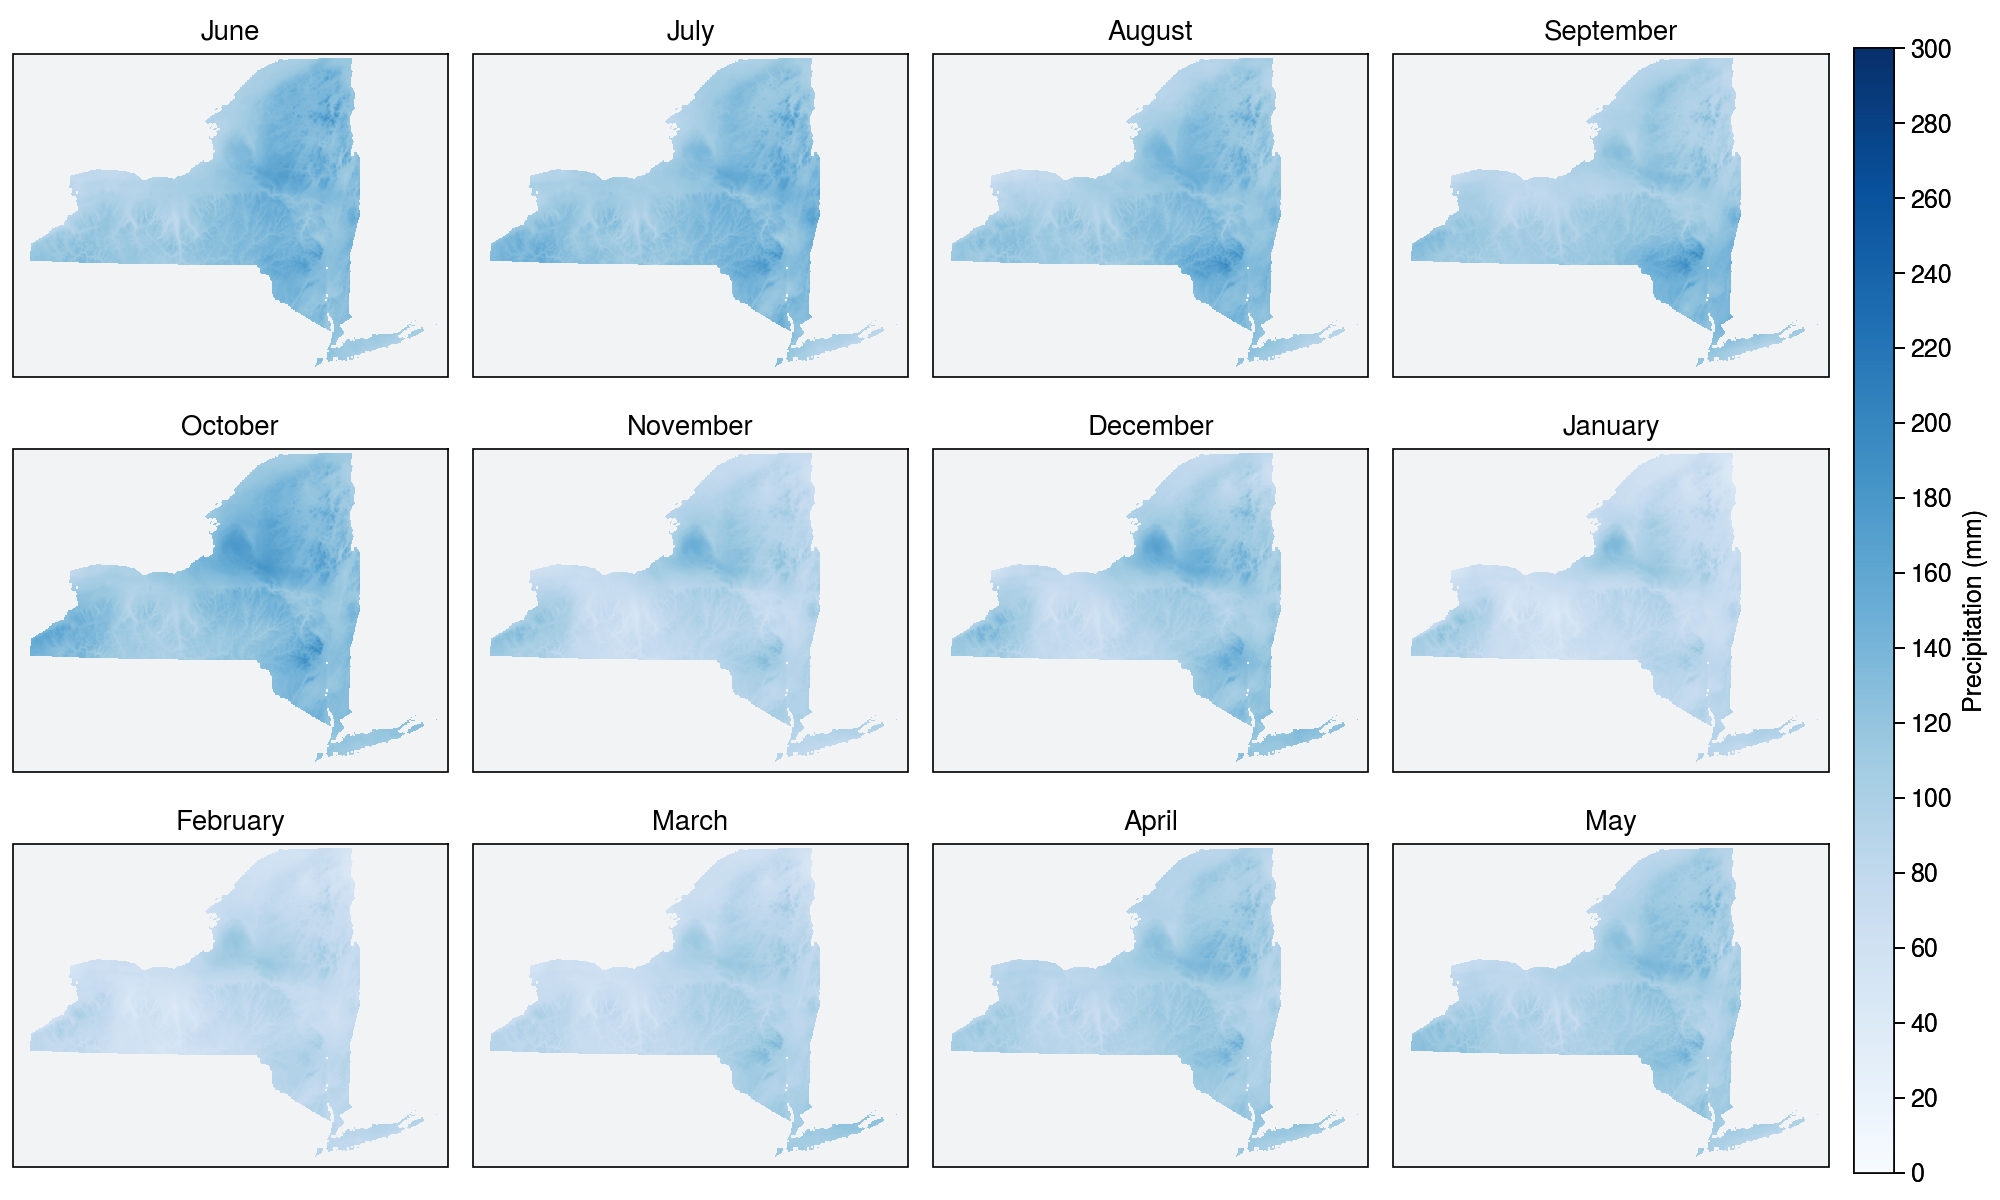

In [42]:
fig, axes = pplt.subplots(nrows=3, ncols=4, figsize=(10,6), proj=dest_crs, facecolor='white')

vmin = 0
vmax = 300

for i, month in enumerate(months):
    m = axes[i].imshow(images[month][0], cmap='Blues', transform=dest_crs, vmin=vmin, vmax=vmax,
                       extent=[bounds[month][0], bounds[month][2], bounds[month][1], bounds[month][3]])
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].format(grid=False, facecolor='gray1', title=month.title())

fig.colorbar(m, label='Precipitation (mm)', ticks=20, loc='r')

fig.savefig('./Figures/Enviro/prcp_mean.png')

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

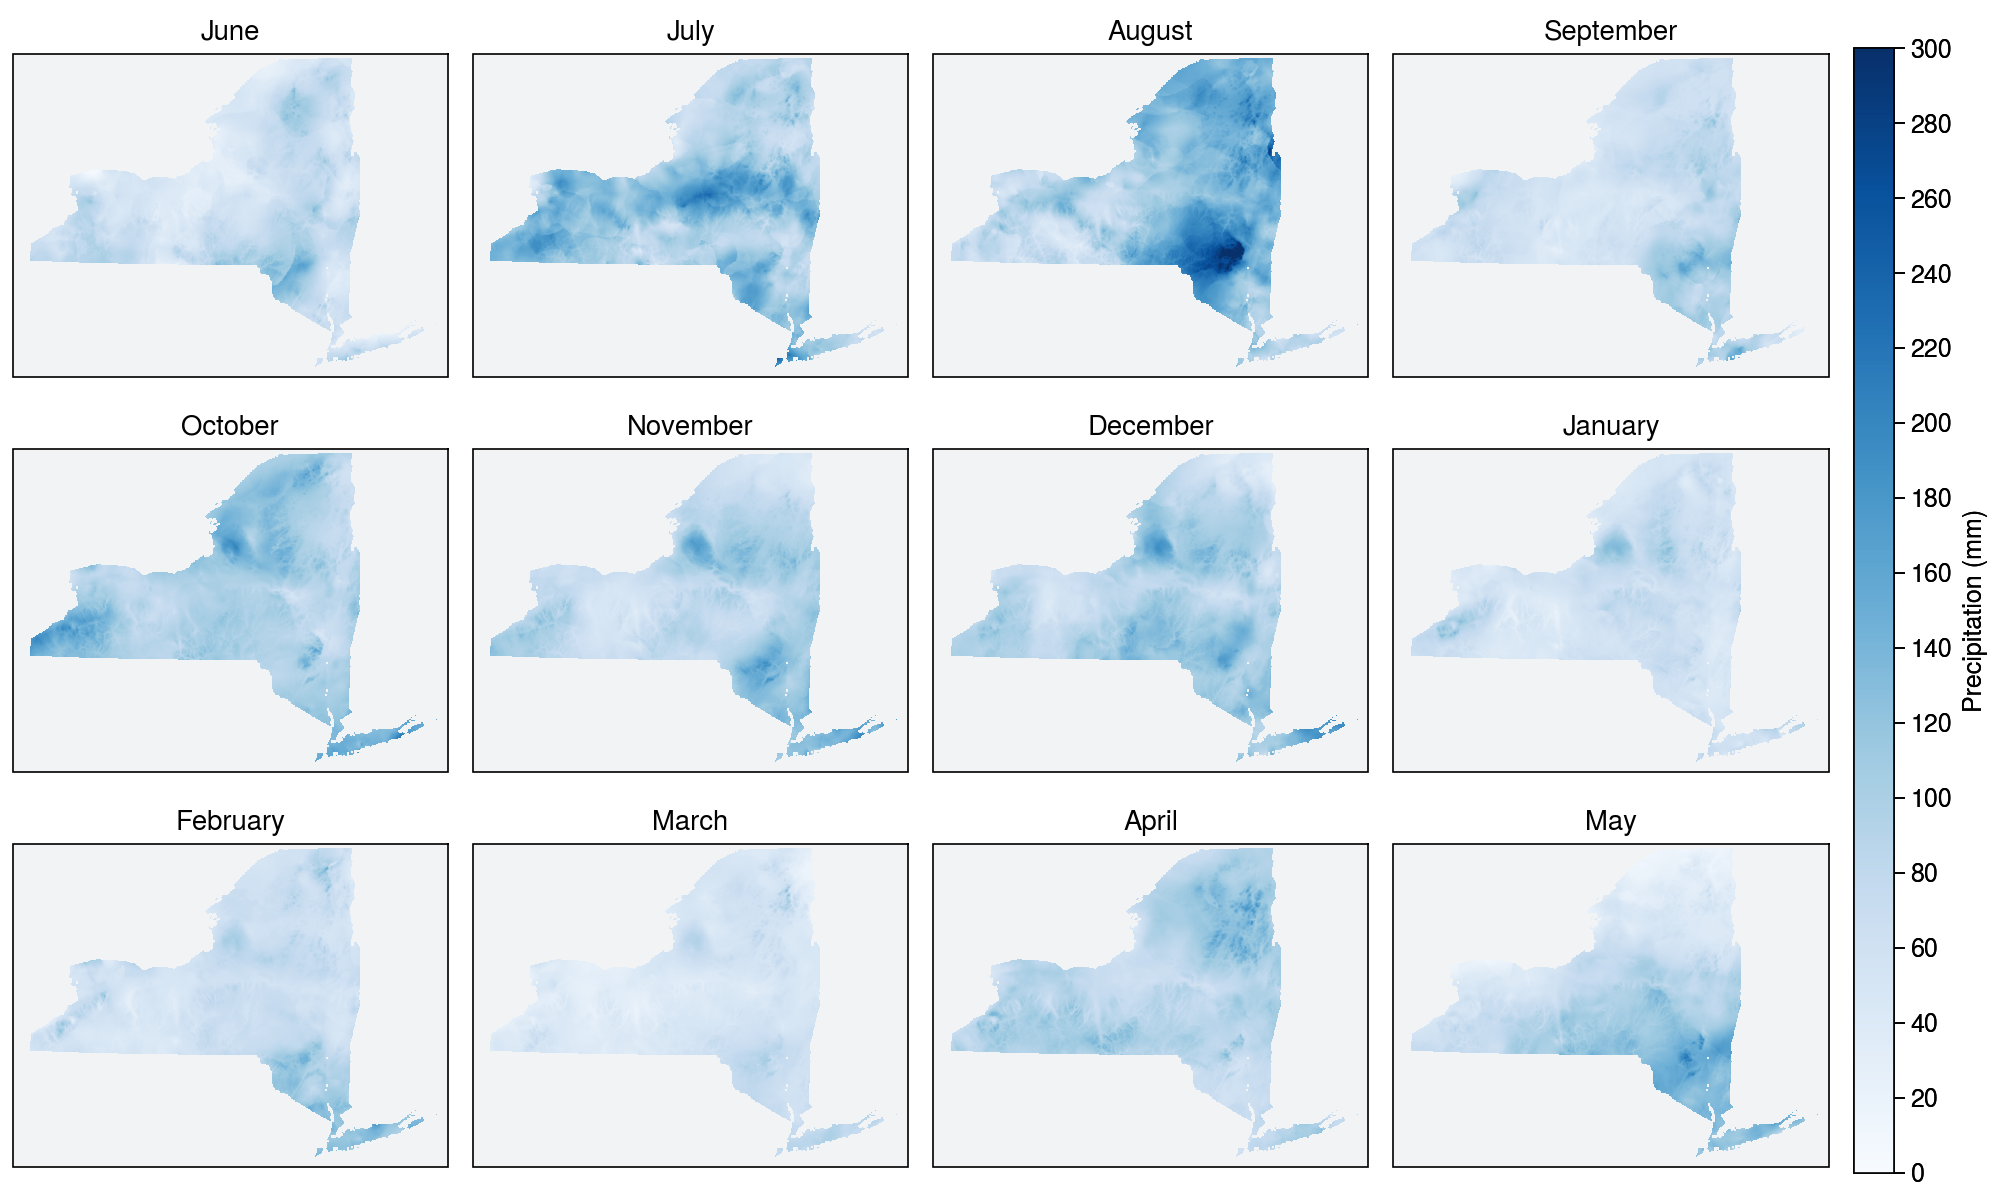

In [43]:
fig, axes = pplt.subplots(nrows=3, ncols=4, figsize=(10,6), proj=dest_crs, facecolor='white')

vmin = 0
vmax = 300

for i, month in enumerate(months):
    m = axes[i].imshow(images[month][1], cmap='Blues', transform=dest_crs, vmin=vmin, vmax=vmax,
                       extent=[bounds[month][0], bounds[month][2], bounds[month][1], bounds[month][3]])
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].format(grid=False, facecolor='gray1', title=month.title())

fig.colorbar(m, label='Precipitation (mm)', ticks=20, loc='r')

fig.savefig('./Figures/Enviro/prcp_prior_year.png')

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\cartopy\mpl\geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnin

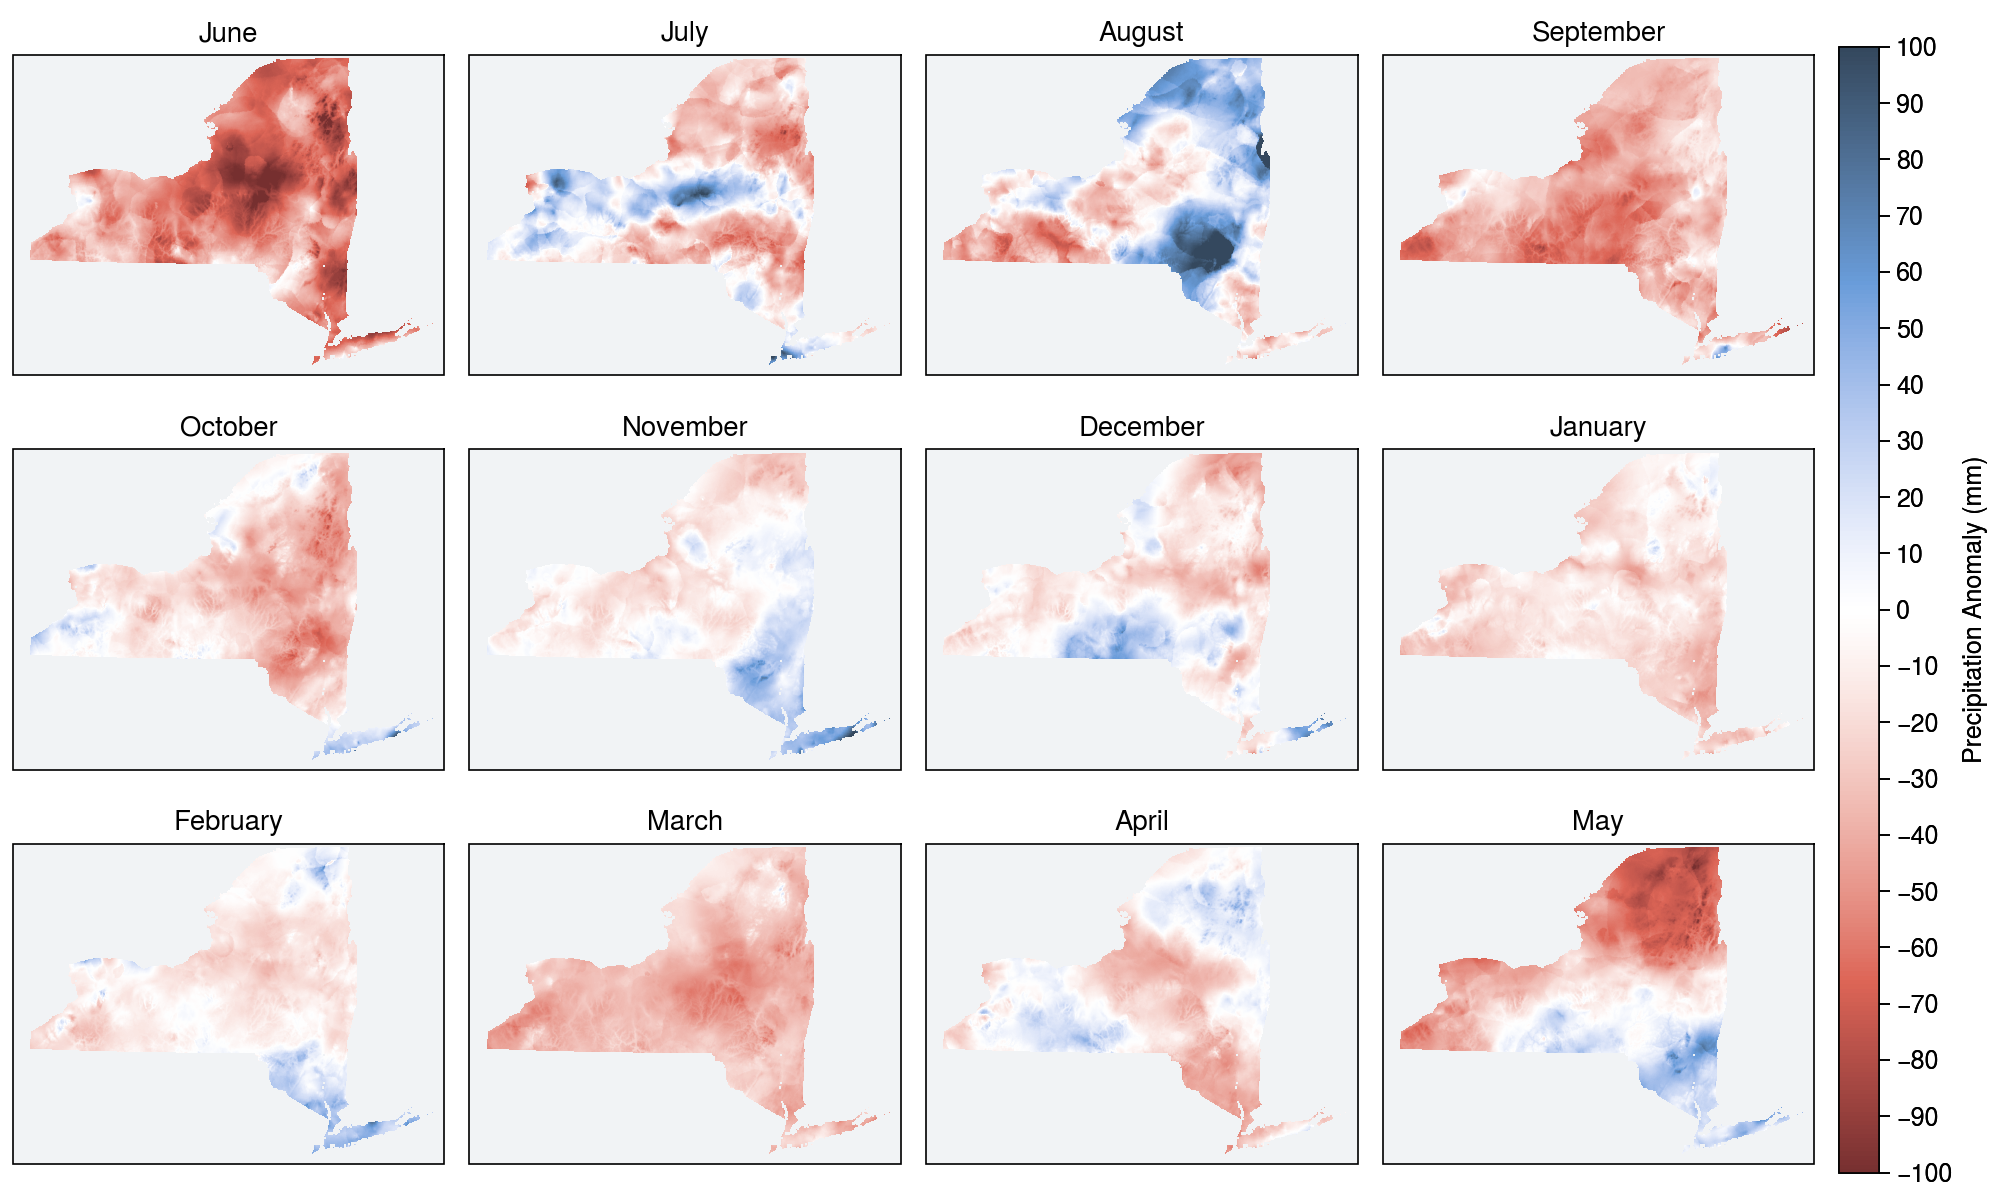

In [44]:
fig, axes = pplt.subplots(nrows=3, ncols=4, figsize=(10,6), proj=dest_crs, facecolor='white')

vmin = -100
vmax = 100

for i, month in enumerate(months):
    m = axes[i].imshow(images[month][2], cmap='NegPos_r', transform=dest_crs, vmin=vmin, vmax=vmax,
                       extent=[bounds[month][0], bounds[month][2], bounds[month][1], bounds[month][3]])
    axes[i].set_extent([-80, -71.7, 40.3, 45], crs=ccrs.PlateCarree())
    axes[i].format(grid=False, facecolor='gray1', title=month.title())

fig.colorbar(m, label='Precipitation Anomaly (mm)', ticks=10, loc='r')

fig.savefig('./Figures/Enviro/prcp_anom.png')